### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Importing Dataset

In [2]:
df = pd.read_excel('ECOMM DATA.xlsx', sheet_name = 'Orders')

### Exploring the details of the dataset

In [3]:
df.shape

(51290, 24)

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


### Data Cleaning 

#### Finding missing values 

In [5]:
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

#### Removing missing values and duplicate values  

In [6]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

### Data Analysis 

#### Descriptive Analysis

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [9]:
df['Total_Sales'] = df['Quantity'] * df['Sales']
summary = df.describe()
print(summary)

             Row ID                     Order Date  \
count   9994.000000                           9994   
mean   36293.500000  2013-04-30 19:20:02.401440768   
min    31297.000000            2011-01-04 00:00:00   
25%    33795.250000            2012-05-23 00:00:00   
50%    36293.500000            2013-06-27 00:00:00   
75%    38791.750000            2014-05-15 00:00:00   
max    41290.000000            2014-12-31 00:00:00   
std     2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2013-05-04 18:20:49.229537792  55190.379428    229.858001     3.789574   
min              2011-01-08 00:00:00   1040.000000      0.444000     1.000000   
25%              2012-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2013-06-30 00:00:00  56430.500000     54.490000     3.000000   
75%              2014-05-19

### Trend Analysis

In [10]:
sales_trend = df.groupby('Order Date')['Total_Sales'].sum().reset_index()
sales_trend

,Order Date,Total_Sales
0,2011-01-04,32.8960
1,2011-01-05,860.6400
2,2011-01-06,58.6080
3,2011-01-07,28430.7800
4,2011-01-08,303.1940
...,...,...
1233,2014-12-27,1779.4700
1234,2014-12-28,381.7680
1235,2014-12-29,7074.4516
1236,2014-12-30,14749.8300


### Visualization 

#### Sales Trends

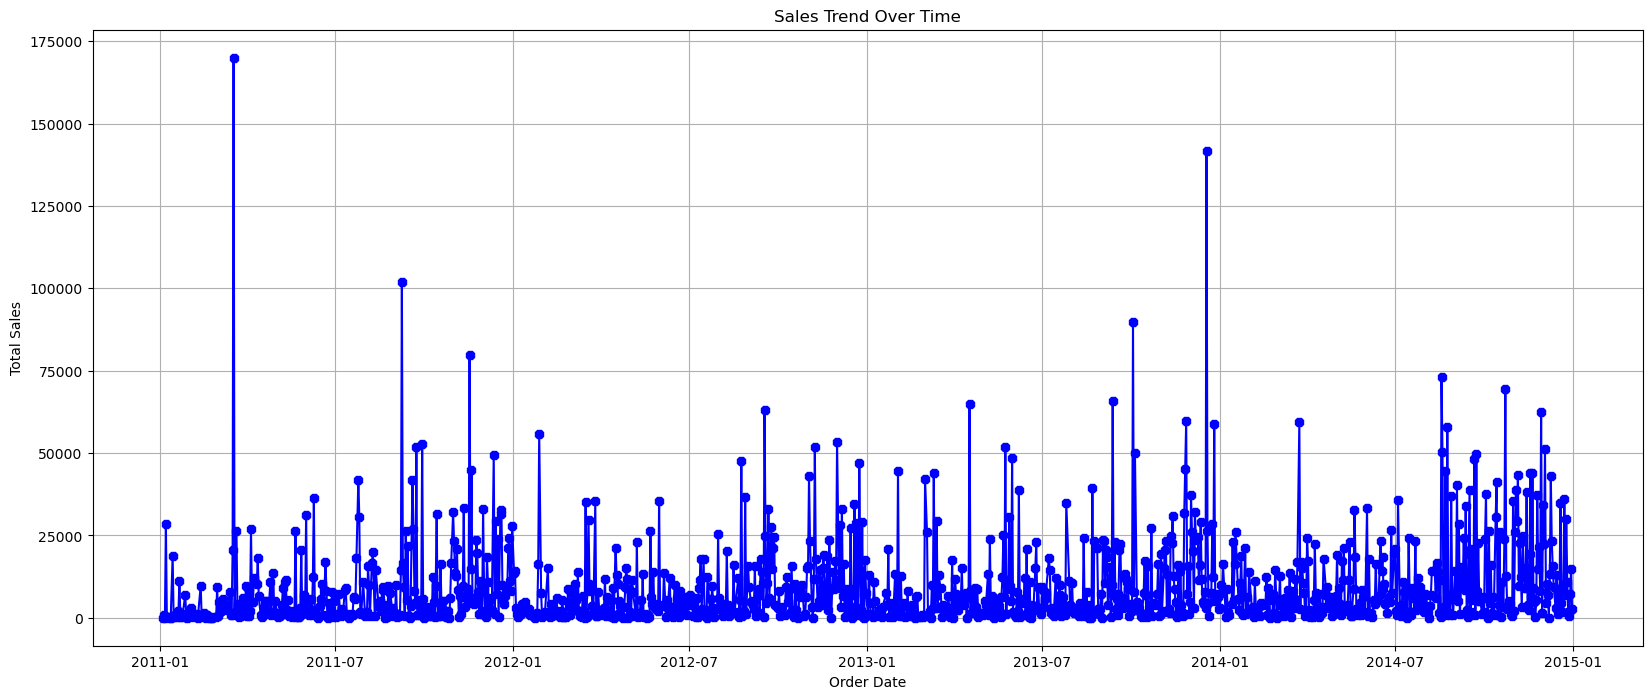

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(sales_trend['Order Date'], sales_trend['Total_Sales'], marker='8', color = 'b')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### Total Region based Total sales distribution

In [12]:
reg_trend = df.groupby('Region')['Total_Sales'].sum().reset_index()
reg_trend

,Region,Total_Sales
0,Central,2.475833e+06
1,East,3.379326e+06
2,South,2.037675e+06
3,West,3.595228e+06


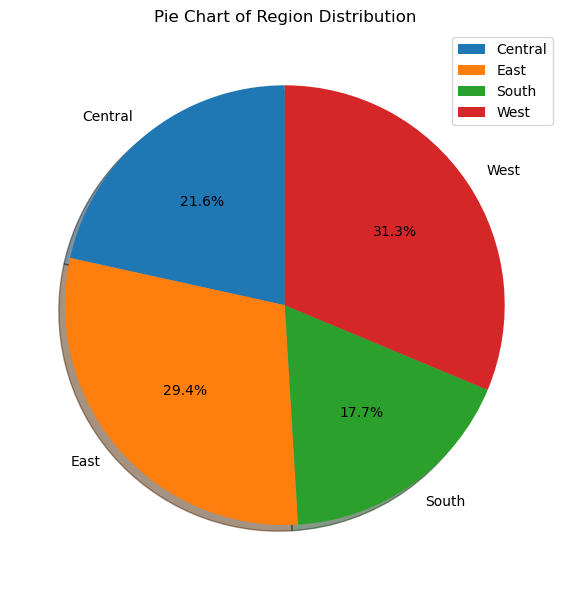

In [13]:
plt.figure(figsize=(8,6))
plt.pie(reg_trend['Total_Sales'], labels=reg_trend['Region'], autopct='%1.1f%%', shadow = True, startangle=90)
plt.title('Pie Chart of Region Distribution')
#plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

### City Trend Analysis

In [14]:
city_trend = df.groupby('City')['Total_Sales'].sum().reset_index()
city_trend

,City,Total_Sales
0,Aberdeen,76.500
1,Abilene,2.784
2,Akron,7188.776
3,Albuquerque,11668.980
4,Alexandria,31150.490
...,...,...
526,Woonsocket,715.130
527,Yonkers,49278.674
528,York,3227.390
529,Yucaipa,254.000


In [15]:
top_10_values = city_trend.nlargest(10, 'Total_Sales')
print(top_10_values)

              City   Total_Sales
329  New York City  1.263478e+06
266    Los Angeles  8.732093e+05
452        Seattle  5.976152e+05
374   Philadelphia  5.677739e+05
438  San Francisco  5.414257e+05
207        Houston  3.060533e+05
123        Detroit  2.704153e+05
437      San Diego  2.605732e+05
216   Jacksonville  2.417714e+05
464    Springfield  2.348053e+05


### Total Sales distribution based on Top 10 cities

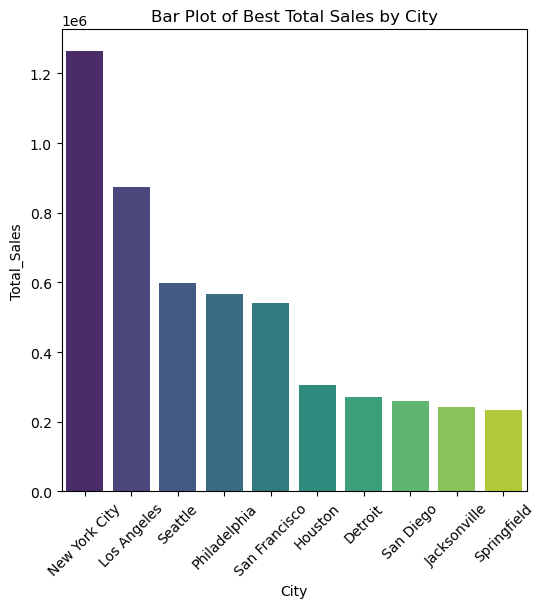

In [16]:
plt.figure(figsize=(6, 6))
sns.barplot(x='City', y='Total_Sales', data=top_10_values, palette='viridis')
plt.title('Bar Plot of Best Total Sales by City')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.ylabel('Total_Sales')
plt.show()

### Total Sales distribution based on top 10 states and trend analysis

In [17]:
State_trend = df.groupby('State')['Total_Sales'].sum().reset_index()
State_trend
top_10_state = State_trend.nlargest(10, 'Total_Sales')
print(top_10_state)

           State   Total_Sales
3     California  2.301218e+06
30      New York  1.561073e+06
41         Texas  8.340883e+05
45    Washington  6.923602e+05
36  Pennsylvania  6.021270e+05
8        Florida  4.720913e+05
20      Michigan  4.103509e+05
44      Virginia  3.764538e+05
11      Illinois  3.650843e+05
33          Ohio  3.625338e+05


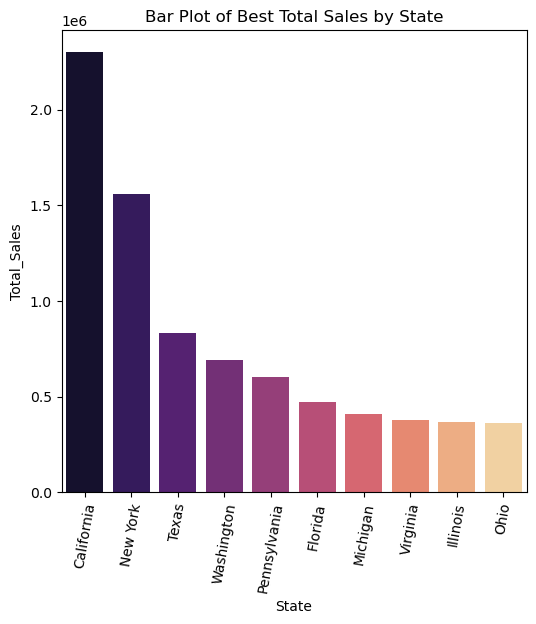

In [18]:
plt.figure(figsize=(6, 6))
sns.barplot(x='State', y='Total_Sales', data=top_10_state, palette='magma')
plt.title('Bar Plot of Best Total Sales by State')
plt.xlabel('State')
plt.xticks(rotation=80)
plt.ylabel('Total_Sales')
plt.show()

### Based on Category Total Sales Distribution and Trends Analysis

In [21]:
cat_trend = df.groupby('Category')['Total_Sales'].sum().reset_index()
cat_trend

,Category,Total_Sales
0,Furniture,3.859215e+06
1,Office Supplies,3.548585e+06
2,Technology,4.080262e+06


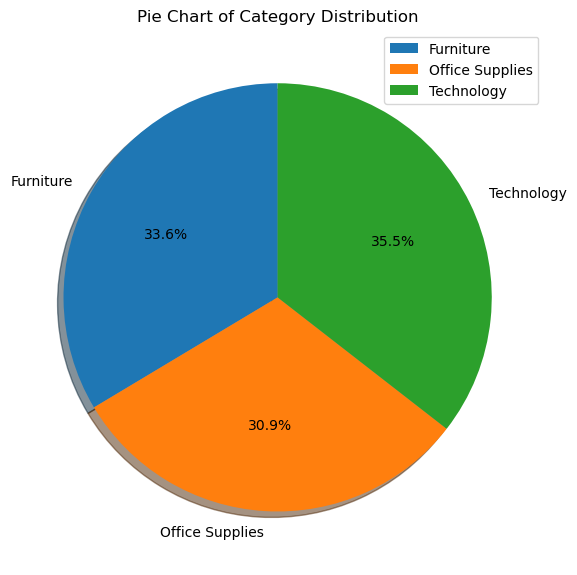

In [22]:
plt.figure(figsize=(6,6))
plt.pie(cat_trend['Total_Sales'], labels=cat_trend['Category'], autopct='%1.1f%%', shadow = True, startangle=90)

#plt.pie(cat_trend['Total_Sales'], labels=cat_trend['Category'], autopct='%1.1f%%', shadow = True, startangle=90)
plt.title('Pie Chart of Category Distribution')
#plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

### Total Sales Distribution based on all sub-categories

In [23]:
sub_cat_trend = df.groupby('Sub-Category')['Total_Sales'].sum().reset_index()
sub_cat_trend

,Sub-Category,Total_Sales
0,Accessories,8.789225e+05
1,Appliances,5.473685e+05
2,Art,1.360211e+05
3,Binders,1.013454e+06
4,Bookcases,5.978261e+05
5,Chairs,1.662758e+06
6,Copiers,6.577212e+05
7,Envelopes,7.417935e+04
8,Fasteners,1.705779e+04
9,Furnishings,4.541168e+05


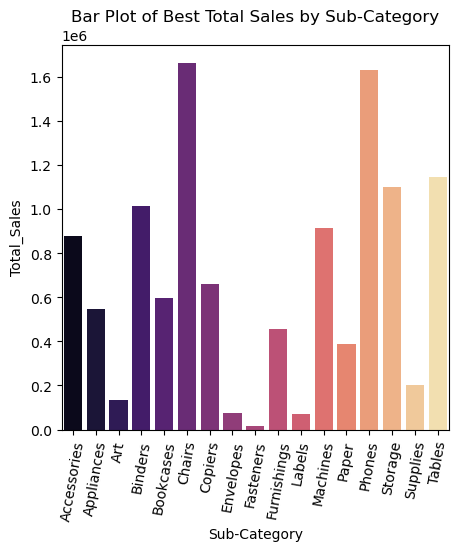

In [24]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Sub-Category', y='Total_Sales', data=sub_cat_trend, palette='magma')
plt.title('Bar Plot of Best Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.xticks(rotation=80)
plt.ylabel('Total_Sales')
plt.show()

In [25]:
top_16_sub_cat = sub_cat_trend.nlargest(16, 'Total_Sales')
print(top_16_sub_cat)

   Sub-Category   Total_Sales
5        Chairs  1.662758e+06
13       Phones  1.628828e+06
16       Tables  1.144514e+06
14      Storage  1.099229e+06
3       Binders  1.013454e+06
11     Machines  9.147899e+05
0   Accessories  8.789225e+05
6       Copiers  6.577212e+05
4     Bookcases  5.978261e+05
1    Appliances  5.473685e+05
9   Furnishings  4.541168e+05
12        Paper  3.894044e+05
15     Supplies  2.012358e+05
2           Art  1.360211e+05
7     Envelopes  7.417935e+04
10       Labels  7.063476e+04


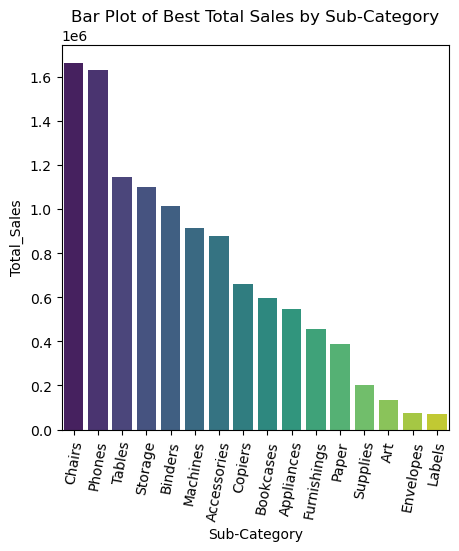

In [26]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Sub-Category', y='Total_Sales', data=top_16_sub_cat, palette='viridis')
plt.title('Bar Plot of Best Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.xticks(rotation=80)
plt.ylabel('Total_Sales')
plt.show()

In [27]:
pdkt_trend = df.groupby('Product Name')['Total_Sales'].sum().reset_index()
pdkt_trend

,Product Name,Total_Sales
0,"""While you Were Out"" Message Book, One Form pe...",68.264
1,"#10 Gummed Flap White Envelopes, 100/Box",125.552
2,#10 Self-Seal White Envelopes,463.562
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",2820.600
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",1366.936
...,...,...
1836,iKross Bluetooth Portable Keyboard + Cell Phon...,3268.200
1837,iOttie HLCRIO102 Car Mount,879.560
1838,iOttie XL Car Mount,1695.152
1839,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,1975.302


### Total Sales Distribution based on top products

In [28]:
top_20_pdkt = pdkt_trend.nlargest(16, 'Total_Sales')
print(top_20_pdkt)

                                           Product Name  Total_Sales
403               Canon imageCLASS 2200 Advanced Copier  253399.2760
686    GBC Ibimaster 500 Manual ProClick Binding System  171524.8920
443   Cisco TelePresence System EX90 Videoconferenci...  135830.8800
784        HON 5400 Series Task Chairs for Big and Tall  124494.0480
1386                            Samsung Galaxy Mega 6.3  118101.1880
803                Hewlett Packard LaserJet 3310 Copier  111478.1420
648   Fellowes PB500 Electric Punch Plastic Comb Bin...  100662.4080
983           Lexmark MX611dhe Monochrome Laser Printer   93329.4510
18     3D Systems Cube Printer, 2nd Generation, Magenta   84499.3500
1349  Riverside Palais Royal Lawyers Bookcase, Royal...   81561.1284
424   Chromcraft Bull-Nose Wood Oval Conference Tabl...   81324.6480
1041  Martin Yale Chadless Opener Electric Letter Op...   80949.1320
497               DMI Eclipse Executive Suite Bookcases   79781.0650
785   HP Designjet T520 Inkjet Lar

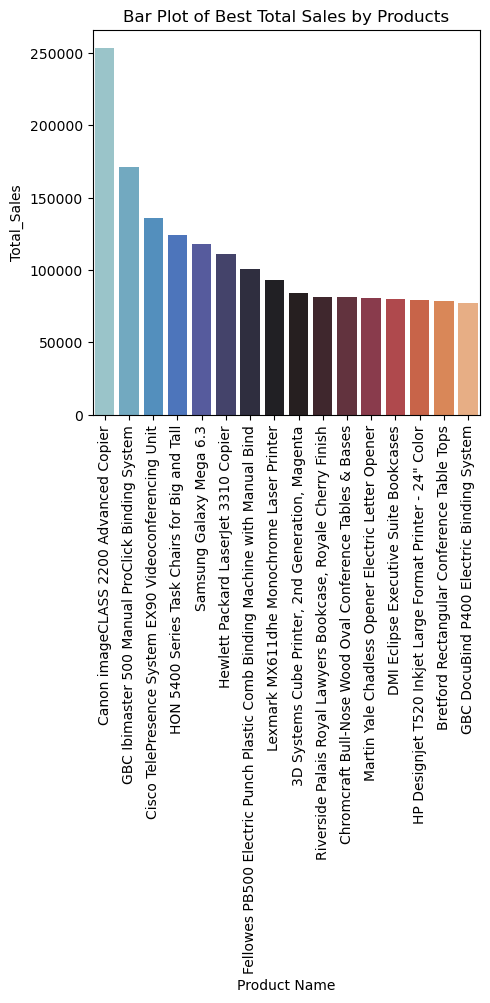

In [29]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Product Name', y='Total_Sales', data=top_20_pdkt, palette='icefire')
plt.title('Bar Plot of Best Total Sales by Products')
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.ylabel('Total_Sales')
plt.show()

In [30]:
priority_trend = df.groupby('Order Priority')['Total_Sales'].sum().reset_index()
priority_trend

,Order Priority,Total_Sales
0,Critical,8.820550e+05
1,High,3.462176e+06
2,Low,3.944333e+05
3,Medium,6.749397e+06


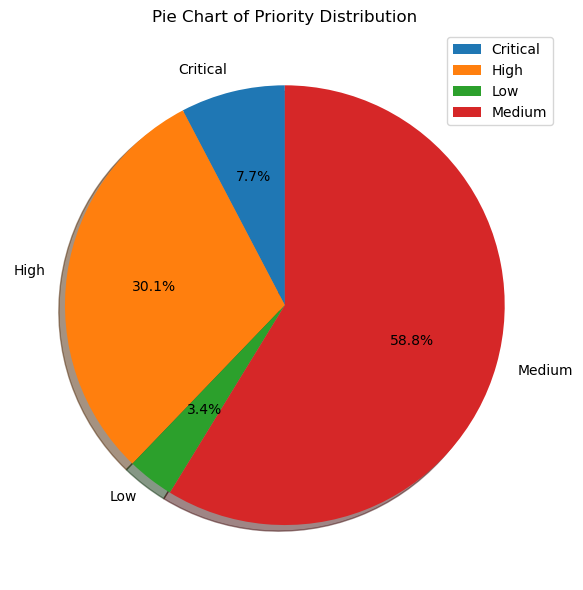

In [31]:
plt.figure(figsize=(6,6))
plt.pie(priority_trend['Total_Sales'], labels=priority_trend['Order Priority'], autopct='%1.1f%%', shadow = True, startangle=90)

#plt.pie(cat_trend['Total_Sales'], labels=cat_trend['Category'], autopct='%1.1f%%', shadow = True, startangle=90)
plt.title('Pie Chart of Priority Distribution')
#plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()